# 根据学生基本信息以及学术表现预测考试成绩

## 1. 此教程的目地

该教程会通过实例对一个现实中的数据集进行完整的分析和处理，步骤包括数据集的探索，前处理，可视化，特征工程，到最后的机器学习建模和预测（逻辑回归），希望可以帮助大家了解什么是数据分析和机器学习。

该教程中展示的所有分析步骤基本概括了参加天池平台数据分析和机器学习算法类比赛所需要经历的一个过程，虽然是一个极度简化版的过程，但也希望可以帮助大家入门天池平台的大数据竞赛。

注意：学习此教程需要基础的Python编程知识


## 2. 探索性数据分析(Exploratory Data Analysis)

**探索性数据分析的目的：**  

1. 确保数据集本身是可用的，包括但不限于：  
	a) 检查数据本身是否平衡(balanced or not)，并处理   
	b) 检查数据本身是否有缺失值 (missing value)，并处理  
	c) 检查数据本身是否有一些明显的异类数据(outlier), 根据情况再做处理 
    
2. 检查数据集本身特质，确定适合的机器学习模型（machine learning model）  
	a) 有监督模型（Supervised） VS 无监督模型（Unsupervised）  
   b) 回归模型（Regression） VS 分类模型（Classification)
   
3. 通过数据可视化，建立一个对于数据集的直觉（intuition）和认知(understanding)  

4. 通过数据可视化，大致了解特征与结果之间的联系，进一步确定适合的机器学习模型

5. 预测并验证未来模型产出的结果

6. 对用在模型中的特征做初步的筛选

7. 为特征工程（feature engineering）部分做准备

**经验：**   

探索性数据分析本身就是一个伴随未知和不确定性的过程，需要耗费大量的精力。

在分析数据前，如果数据分析师对模型和结果所用的业务场景和领域有充分了解，并且目的性清晰明确，会大大缩短分析所用的时间和精力  



In [1]:
# list datalab file
!ls datalab/1716

StudentPerformance.csv


In [2]:
# 引入库包
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# 读取数据集，并且存在datafram表结构中，命名为df
df = pd.read_csv('datalab/1716/StudentPerformance.csv')

**核心库包介绍：**   

Numpy是Python的一个科学计算的库包，提供了矩阵运算的功能

pandas 是基于 Numpy 构建的含有更高级数据结构和工具的数据分析包， pandas 是围绕着 Series 和 DataFrame 两个核心数据结构展开的 。Series 和 DataFrame 分别对应于一维的序列和二维的表结构，此教程中只会用到DataFrame这个表结构

matplotlib 是Python编程语言及其数值数学扩展包 NumPy的可视化操作界面

seaborn是基于matplotlib开发的可视化库包，比matplotlib更加容易使用，而且图例的风格更加现代化

## 2. 数据集探索

**数据集简介:**
该数据集包含了305个男生和175个女生的基本情况和课堂课外表现的量化数据，最终目的是通过这些特征来预测学生的最终学术评测成绩

In [3]:
df.head(10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
5,F,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,42,30,13,70,Yes,Bad,Above-7,M
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M


**特征(Features)介绍：**  
Gender: 性别   
Nationality: 国籍    
PlaceofBirth：出生地  
StageID：学校级别（小学，中学，高中）  
GradeID：年级 (G01 - G12)  
SectionID: 班级   
Topic：学科科目  
Semester: 学期 （春学期，秋学期）  
Relation: 孩子家庭教育负责人（父亲，母亲）  
RaisedHands: 学生该学期上课举手的次数  
VisitedResources: 学生浏览在线课件的次数  
AnnoucementsView: 学生浏览学校公告的次数   
Discussion: 学生参与课堂讨论的次数  
ParentAnsweringSurvey: 家长是否填写了关于学校的问卷调查 （是，否）  
ParentSchoolSatisfaction: 家长对于学校的满意度 （好，不好）  
StudentAbsenceDays: 学生缺勤天数 （大于7天，低于7天）  
  
**结果(Response Variable)介绍：**  
Class: 根据学生最后的学术评测分数，学生会被分为3个等级  
1. Low-Level: 分数区间在0-60  
2. Middle-Level:分数区间在70-89  
3. High-Level:分数区间在90-100  


In [4]:
# 检查数据集大小
df.shape

(480, 17)

In [5]:
# 检查数据集是否有空缺值
print(df.isnull().sum())

# 可以看出在这个数据集中并没有空缺值

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


In [6]:
# 检查每个特征的数据类型
print(df.dtypes)

gender                      object
NationalITy                 object
PlaceofBirth                object
StageID                     object
GradeID                     object
SectionID                   object
Topic                       object
Semester                    object
Relation                    object
raisedhands                  int64
VisITedResources             int64
AnnouncementsView            int64
Discussion                   int64
ParentAnsweringSurvey       object
ParentschoolSatisfaction    object
StudentAbsenceDays          object
Class                       object
dtype: object


In [7]:
df.describe(include = 'all')

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
count,480,480,480,480,480,480,480,480,480,480.000000,480.000000,480.000000,480.000000,480,480,480,480
unique,2,14,14,3,10,3,12,2,2,NaN,NaN,NaN,NaN,2,2,2,3
top,M,KW,KuwaIT,MiddleSchool,G-02,A,IT,F,Father,NaN,NaN,NaN,NaN,Yes,Good,Under-7,M
freq,305,179,180,248,147,283,95,245,283,NaN,NaN,NaN,NaN,270,292,289,211
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46.775000,54.797917,37.918750,43.283333,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.779223,33.080007,26.611244,27.637735,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.750000,20.000000,14.000000,20.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,65.000000,33.000000,39.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.000000,84.000000,58.000000,70.000000,NaN,NaN,NaN,NaN


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
gender                      480 non-null object
NationalITy                 480 non-null object
PlaceofBirth                480 non-null object
StageID                     480 non-null object
GradeID                     480 non-null object
SectionID                   480 non-null object
Topic                       480 non-null object
Semester                    480 non-null object
Relation                    480 non-null object
raisedhands                 480 non-null int64
VisITedResources            480 non-null int64
AnnouncementsView           480 non-null int64
Discussion                  480 non-null int64
ParentAnsweringSurvey       480 non-null object
ParentschoolSatisfaction    480 non-null object
StudentAbsenceDays          480 non-null object
Class                       480 non-null object
dtypes: int64(4), object(13)
memory usage: 63.8+ KB


In [9]:
# 查看分类型特征（categorical feature）中有哪些具体分类
print('Relation',df['Relation'].unique())

Relation ['Father' 'Mum']


In [10]:
# 检查最终结果中有哪些分类
print('Class',df['Class'].unique())

Class ['M' 'L' 'H']


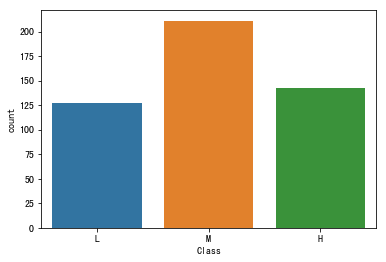

In [11]:
# 检查数据集结果是否平衡
sns.countplot(x = 'Class', order = ['L','M','H'], data = df)


## 3. 数据可视化分析 

下面开始对分类型特征（categorical feature）进行可视化，大致了解这些特征和结果之间的关系


### 3.1 分类型特征之间的可视化

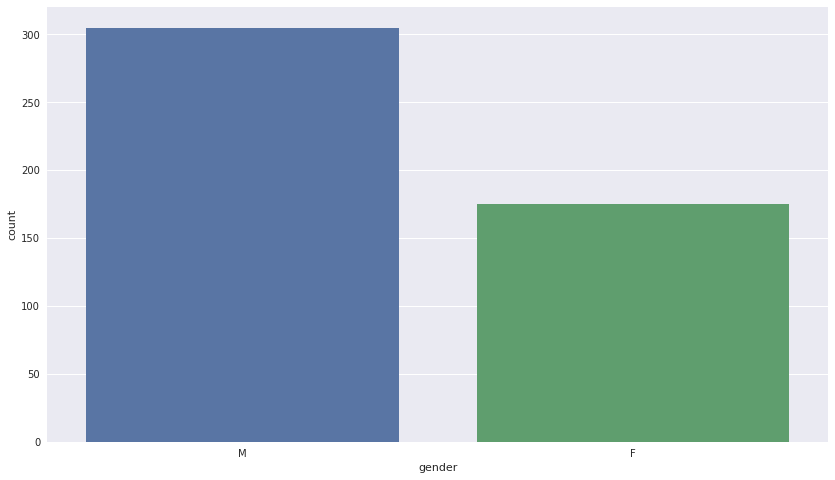

In [26]:
# 了解性别的分布情况
sns.countplot(x='gender', data=df)


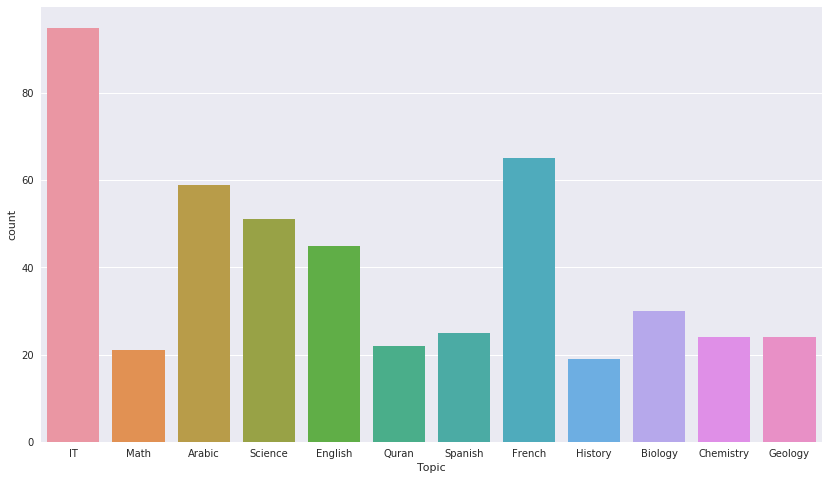

In [27]:
# 了解学科的分布情况
sns.set(rc={'figure.figsize':(14,8)})
sns.countplot(x='Topic', data=df)

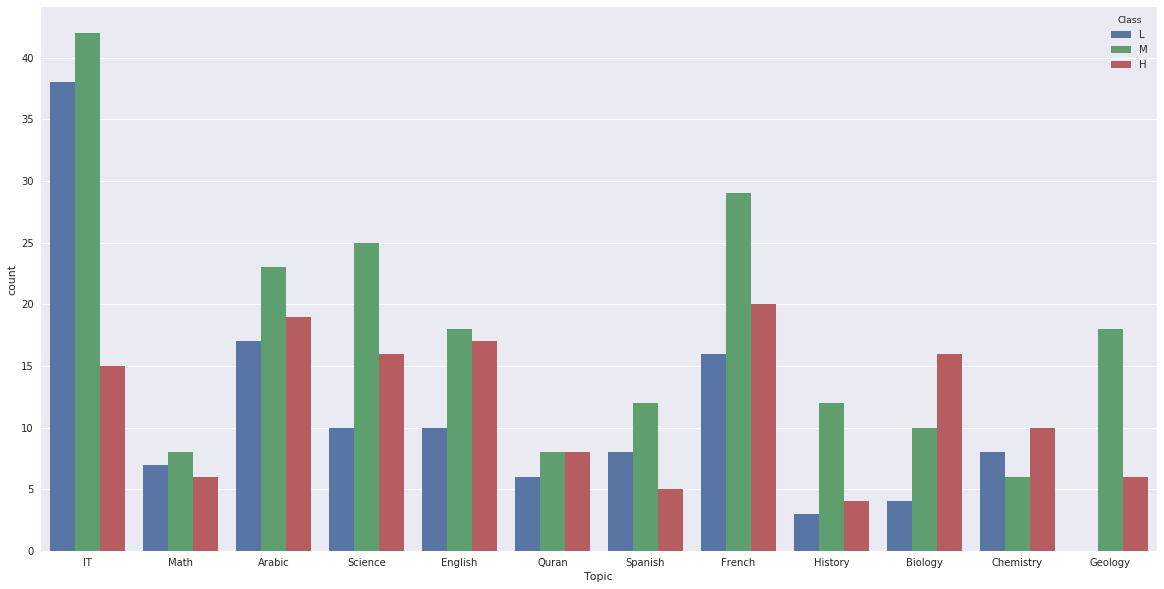

In [13]:
# 了解课程和成绩的相关性
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(x = 'Topic', hue = 'Class',hue_order = ['L','M','H'],data = df)

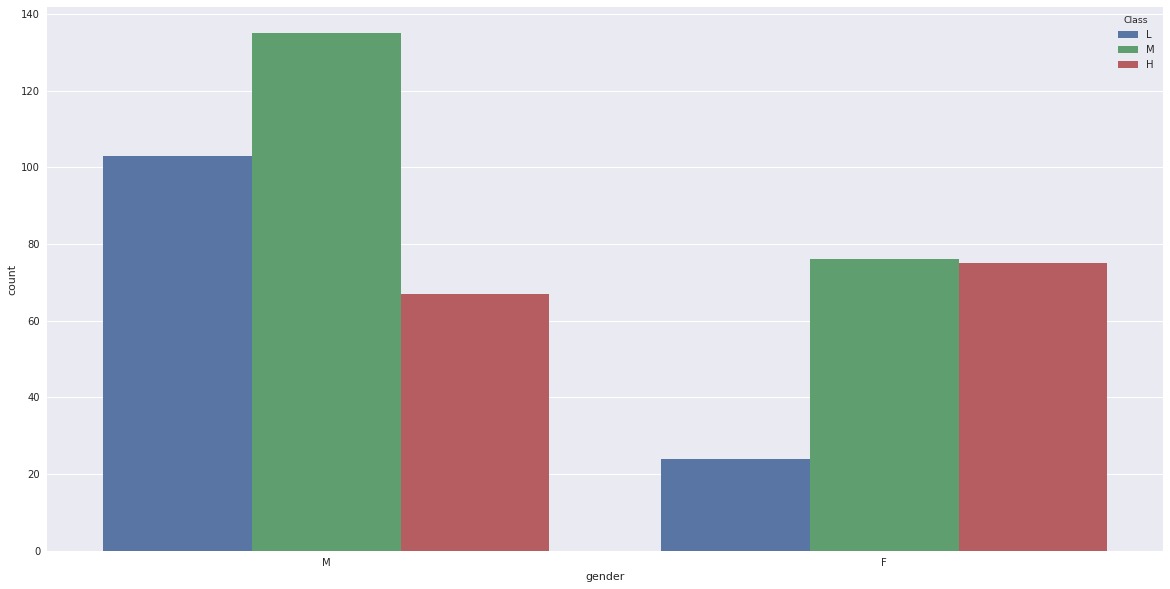

In [14]:
# 了解性别和成绩的相关性
sns.countplot(x = 'gender',hue = 'Class',data = df,order = ['M','F'],hue_order = ['L','M','H'])

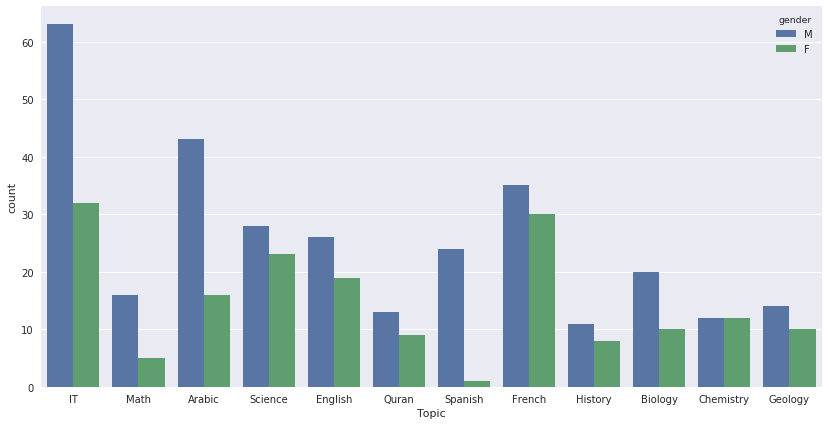

In [28]:
# 了解性别和学科的相关性
sns.set(rc={'figure.figsize':(14,7)})
sns.countplot(x='Topic', hue = 'gender', data=df)

In [33]:
df_temp = df[['Topic', 'gender']]
df_temp['Count'] = 1
df_temp = df_temp.groupby(['Topic','gender']).agg('sum').reset_index()
df_temp.head(4)

,Topic,gender,Count
0,Arabic,F,16
1,Arabic,M,43
2,Biology,F,10
3,Biology,M,20


In [35]:
df_temp2 = df_temp
df_temp2 = df_temp2.groupby('Topic').agg('sum').reset_index()
df_temp2.head(4)

,Topic,Count
0,Arabic,59
1,Biology,30
2,Chemistry,24
3,English,45


In [37]:
df_temp = pd.merge(df_temp,df_temp2, on = ('Topic'), how = 'left')
df_temp.head(5)

,Topic,gender,Count_x,Count_y,Count
0,Arabic,F,16,59,59
1,Arabic,M,43,59,59
2,Biology,F,10,30,30
3,Biology,M,20,30,30
4,Chemistry,F,12,24,24


In [40]:
df_temp['gender proportion in topic'] = df_temp['Count_x']/df_temp['Count_y']
df_temp.head()

,Topic,gender,Count_x,Count_y,Count,gender proportion in topic
0,Arabic,F,16,59,59,0.271186
1,Arabic,M,43,59,59,0.728814
2,Biology,F,10,30,30,0.333333
3,Biology,M,20,30,30,0.666667
4,Chemistry,F,12,24,24,0.500000


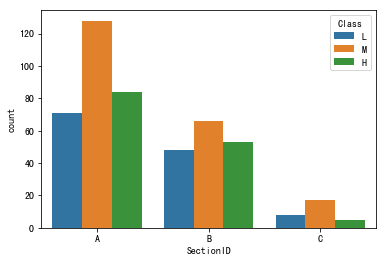

In [13]:
# 了解班级和成绩的相关性
sns.countplot(x = 'SectionID',hue = 'Class',data = df,hue_order = ['L','M','H'])

# 从这里可以看出，虽然每个班人数较少，但是没有哪个班级优秀人数的比例很突出，这个特征可以考虑删除

### 3.2 分类型特征和数字型特征之间的可视化

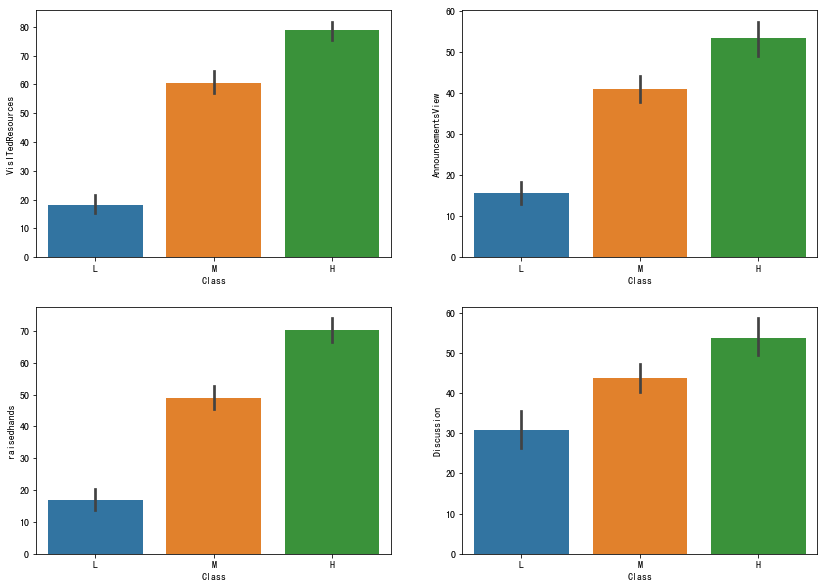

In [5]:
fig, axes = plt.subplots(2,2,figsize = (14,10))
sns.barplot(x = 'Class',y = 'VisITedResources',data = df, order = ['L','M','H'], ax = axes[0,0])
sns.barplot(x = 'Class',y = 'AnnouncementsView',data = df, order = ['L','M','H'],ax = axes[0,1])
sns.barplot(x = 'Class',y = 'raisedhands',data = df, order = ['L','M','H'],ax = axes[1,0])
sns.barplot(x = 'Class',y = 'Discussion',data = df, order = ['L','M','H'],ax = axes[1,1])

# 在sns.barplot中，默认的计算方式为计算平均值

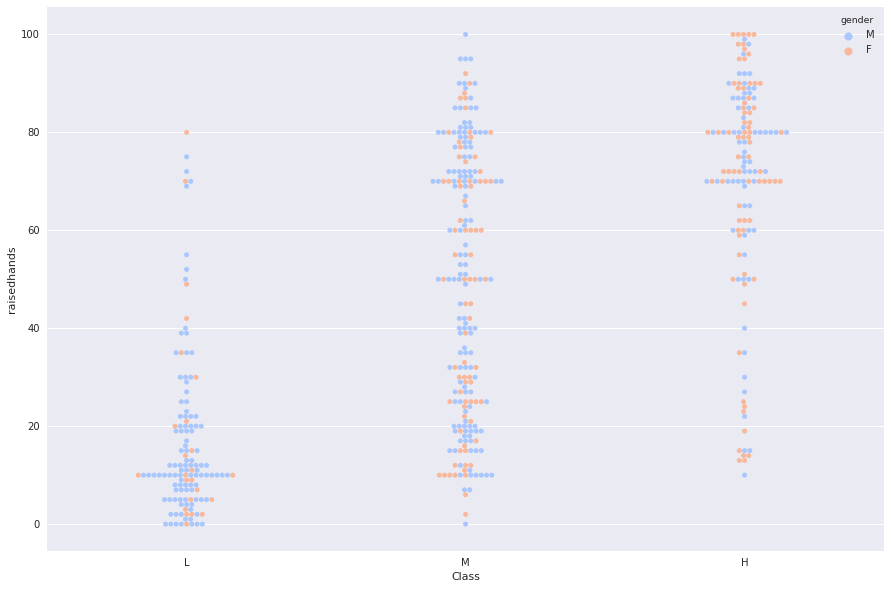

In [6]:
# 了解不同性别的情况下，举手次数和成绩的相关性
sns.set(rc={'figure.figsize':(15,10)})
sns.swarmplot(x = 'Class',y = 'raisedhands',hue = 'gender',data = df,palette = 'coolwarm',order = ['L','M','H'])

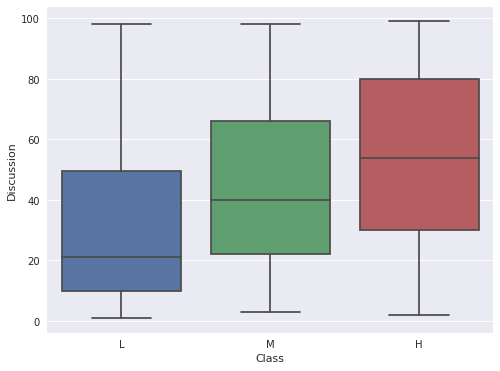

In [24]:
# 了解上课讨论积极程度和成绩的重要性
sns.set(rc={'figure.figsize':(8,6)})
sns.boxplot(x = 'Class',y = 'Discussion', data = df, order = ['L','M','H'])

### 3.3: 数字型特征之间的可视化

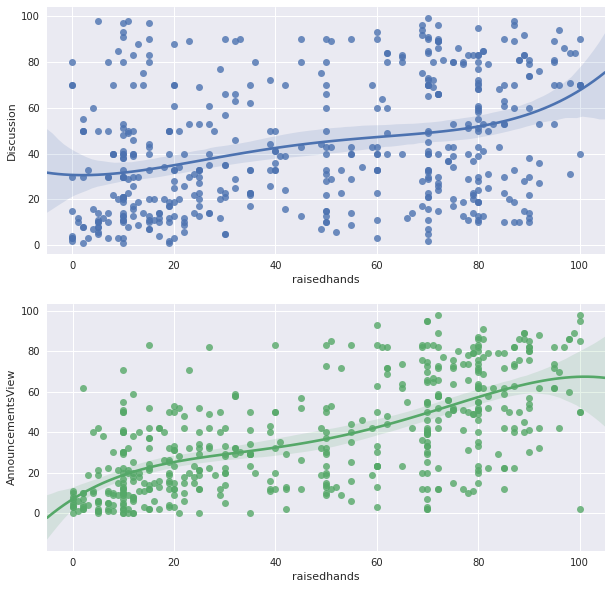

In [25]:
# 了解四个课堂课后量化表现之间的相关性
fig, axes = plt.subplots(2,1,figsize = (10,10))
sns.regplot(x = 'raisedhands',y = 'Discussion',order = 4, data = df, ax = axes[0])
sns.regplot(x = 'raisedhands',y = 'AnnouncementsView',order = 4, data = df, ax = axes[1])

In [7]:
# Correlation Matrix 相关性矩阵
corr = df[['VisITedResources','raisedhands','AnnouncementsView','Discussion']].corr()
corr

,VisITedResources,raisedhands,AnnouncementsView,Discussion
VisITedResources,1.000000,0.691572,0.594500,0.243292
raisedhands,0.691572,1.000000,0.643918,0.339386
AnnouncementsView,0.594500,0.643918,1.000000,0.417290
Discussion,0.243292,0.339386,0.417290,1.000000


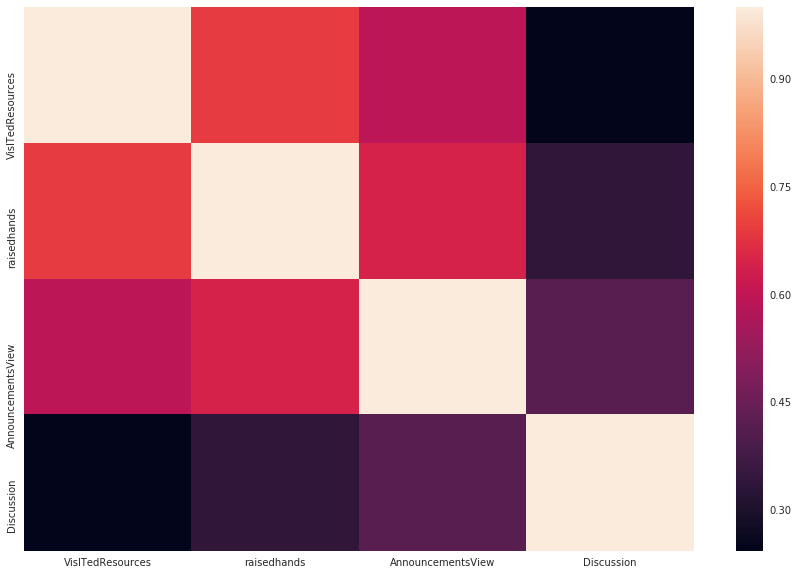

In [8]:
# Correlation Matrix Visualization 相关性矩阵可视化
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# 从上面的相关矩阵以及下方的热力图可以看出，大部分课堂课后表现中，除了课上讨论Discussion, 其他的表现之间都有比较大的相关性，这一点也可以从上面的可视化结果中验证
# 我们可以从这些结果中得知，一般喜欢参与上课讨论的人不一定会经常去浏览课件
# 我们可以做一个猜想：一个不仅积极参与讨论并且还经常浏览课件的学生，是否会比只积极参与其中一项的学生成绩更好呢？

## 4. 机器学习是什么？

机器学习是从示例中学习的算法。 你不需要编写机器学习的算法，而是通过提供大量的相关数据，来训练它们。 例如，不要试图对机器算法解释一只猫看起来是什么样的，你需要通过提供数百万张猫的图片来培训它。 该算法在这些图像中找到重复的模式，并为自己确定如何定义猫的外观。在此之后，当你向该程序显示新照片时，它可以区分照片中是否含有猫的成分。

一个非常简单的逻辑：提供猫的图片越多，训练后的模型越完善和准确

那么，在这次教程中也有类似的过程，我们现在已经处理好了数据，数据集中每一行数据（每一个学生的信息）就是类似于一张猫的图片，我们选用的机器学习算法是逻辑回归，现在我们只需要简单地把每一行数据输入到逻辑回归算法中去，那么它就会自动学习每一行数据中的信息并且建立出一个预测学生成绩的模型，而不需要人为的写代码模型怎么去判断学生的成绩

课后作业1：了解什么是逻辑回归算法以及背后的数学原理/证明过程  
课后作业2：了解一下什么是虚拟变量，逻辑回归中又为什么需要虚拟变量   
课后作业2：思考一下还有什么因素会影响机器学习建模的准确率，这又和特征工程有什么联系

## 5. 模型训练

下面开始训练模型，每个模型板块包括三个部分：
1.特征工程
2.分测试集和数据集
3.训练模型，返回测试结果


### 5.1 逻辑回归（原始特征）


In [12]:
# Feature Engineering 特征工程
X = df.drop('Class',axis = 1)
Y = df['Class']
X = pd.get_dummies(X)
    
X.head(10)

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,...,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,15,16,2,20,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
1,20,20,3,25,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
2,10,7,0,30,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3,30,25,5,35,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,40,50,12,50,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
5,42,30,13,70,1,0,0,0,0,0,...,1,0,1,0,0,1,1,0,1,0
6,35,12,0,17,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
7,50,10,15,22,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
8,12,21,16,50,1,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
9,70,80,25,70,1,0,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1


In [13]:
# Get Train and Test Dataset 区分训练集和测试集

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2,random_state = 10)
y_test.head(5)

219    M
183    M
453    M
380    L
308    M
Name: Class, dtype: object

In [14]:
# Fit and Predict # 训练模型并检测准确率
Logit = LogisticRegression()
Logit.fit(X_train, y_train)
Predict = Logit.predict(X_test)#预测结果
print('Predict',Predict)
Score = accuracy_score(y_test, Predict)
Score

Predict ['H' 'M' 'M' 'L' 'H' 'H' 'M' 'H' 'M' 'L' 'M' 'L' 'H' 'M' 'M' 'H' 'L' 'H'
 'H' 'H' 'L' 'M' 'M' 'M' 'M' 'L' 'H' 'M' 'M' 'H' 'H' 'H' 'L' 'M' 'M' 'L'
 'M' 'M' 'L' 'H' 'M' 'L' 'H' 'L' 'M' 'M' 'H' 'M' 'M' 'H' 'M' 'L' 'H' 'M'
 'M' 'H' 'H' 'L' 'M' 'M' 'H' 'L' 'H' 'M' 'L' 'M' 'M' 'M' 'L' 'H' 'M' 'L'
 'M' 'M' 'M' 'M' 'M' 'L' 'H' 'H' 'L' 'M' 'L' 'L' 'M' 'H' 'L' 'H' 'H' 'M'
 'M' 'L' 'M' 'M' 'H' 'M']


0.66666666666666663

### 5.2 逻辑回归（删除旧特征）

In [22]:
df2 = df

In [30]:
# Feature Engineering 特征工程，删除了原有的 Section
X2 = df2.drop('Class',axis = 1)
X2 = X2.drop('SectionID', axis = 1)#班级
X2 = X2.drop('StageID', axis = 1)#学校级别
X2 = X2.drop('GradeID', axis = 1)#年级
Y2 = df2['Class']
X2 = pd.get_dummies(X2)

X2.head(5)

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,...,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,15,16,2,20,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
1,20,20,3,25,0,1,0,0,0,0,...,1,0,1,0,0,1,0,1,0,1
2,10,7,0,30,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3,30,25,5,35,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,40,50,12,50,0,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [31]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,Y2, test_size = 0.2,random_state = 10)


In [32]:
Logit = LogisticRegression()
Logit.fit(X2_train, y2_train)
Predict = Logit.predict(X2_test)
Score = accuracy_score(y2_test, Predict)
Score

0.73958333333333337

### 5.3 逻辑回归（增加新特征）

In [33]:
df3 = df

In [39]:
# Feature Engineering - 3
df3['DiscussionPlusVisit'] = df3['Discussion'] + df3['VisITedResources']

X3 = df3.drop('Class',axis = 1)
Y3 = df3['Class']
X3 = X3.drop('SectionID', axis = 1)#班级
X3 = X3.drop('StageID', axis = 1)#学校级别
X3 = X3.drop('GradeID', axis = 1)#年级
X3 = pd.get_dummies(X3)

X3.head(5)

,raisedhands,VisITedResources,AnnouncementsView,Discussion,DiscussionPlusVisit,gender_F,gender_M,NationalITy_Egypt,NationalITy_Iran,NationalITy_Iraq,...,Semester_F,Semester_S,Relation_Father,Relation_Mum,ParentAnsweringSurvey_No,ParentAnsweringSurvey_Yes,ParentschoolSatisfaction_Bad,ParentschoolSatisfaction_Good,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
0,15,16,2,20,36,0,1,0,0,0,...,1,0,1,0,0,1,0,1,0,1
1,20,20,3,25,45,0,1,0,0,0,...,1,0,1,0,0,1,0,1,0,1
2,10,7,0,30,37,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
3,30,25,5,35,60,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
4,40,50,12,50,100,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0


In [40]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3,Y3, test_size = 0.2,random_state = 10)


In [41]:
Logit = LogisticRegression()
Logit.fit(X3_train, y3_train)
Predict = Logit.predict(X3_test)
Score = accuracy_score(y3_test, Predict)
Score

0.73958333333333337